# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

**Observation**
- **200 Rows** and **5 Columns** in dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

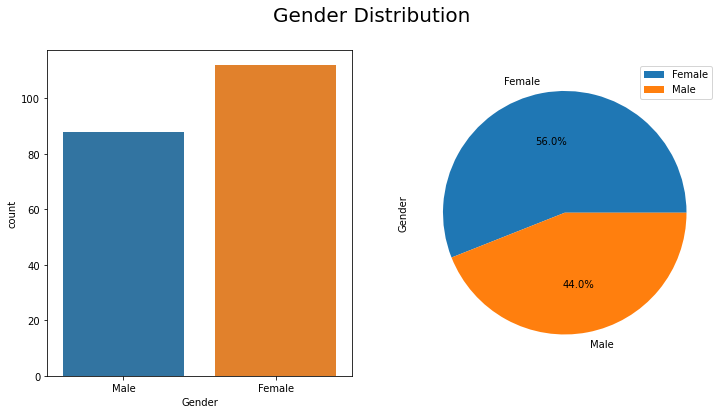

In [8]:
plt.figure(figsize=(12,6))
plt.suptitle("Gender Distribution",fontsize=20)
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.Genre)
plt.xlabel("Gender")
plt.subplot(1,2,2)
df.Genre.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.legend()
plt.ylabel("Gender")
plt.show()

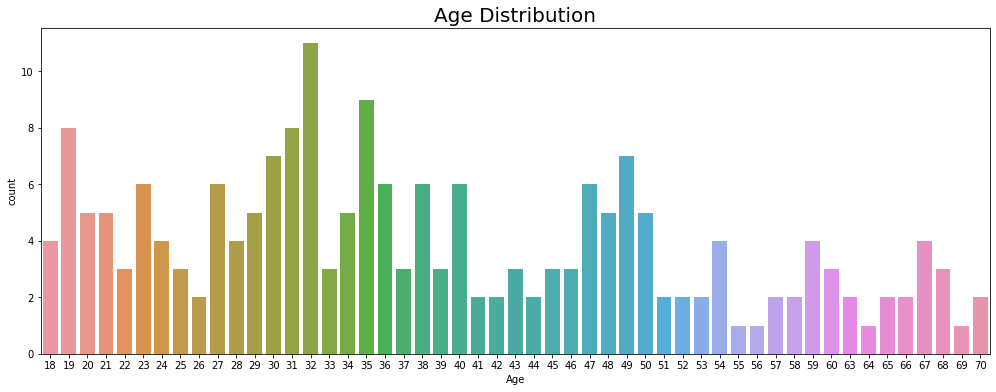

In [9]:
plt.figure(figsize=(17,6))
sns.countplot(data=df,x=df.Age)
plt.title("Age Distribution",fontsize=20)
plt.show()

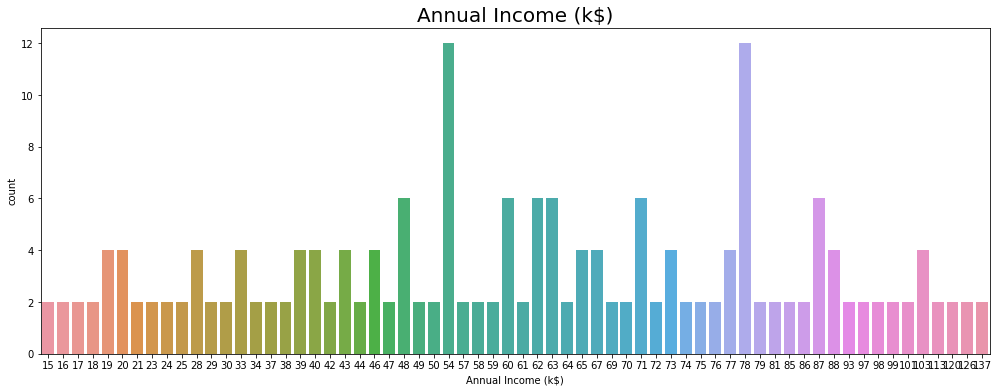

In [10]:
plt.figure(figsize=(17,6))
sns.countplot(data=df,x=df['Annual Income (k$)'])
plt.title("Annual Income (k$)",fontsize=20)
plt.show()

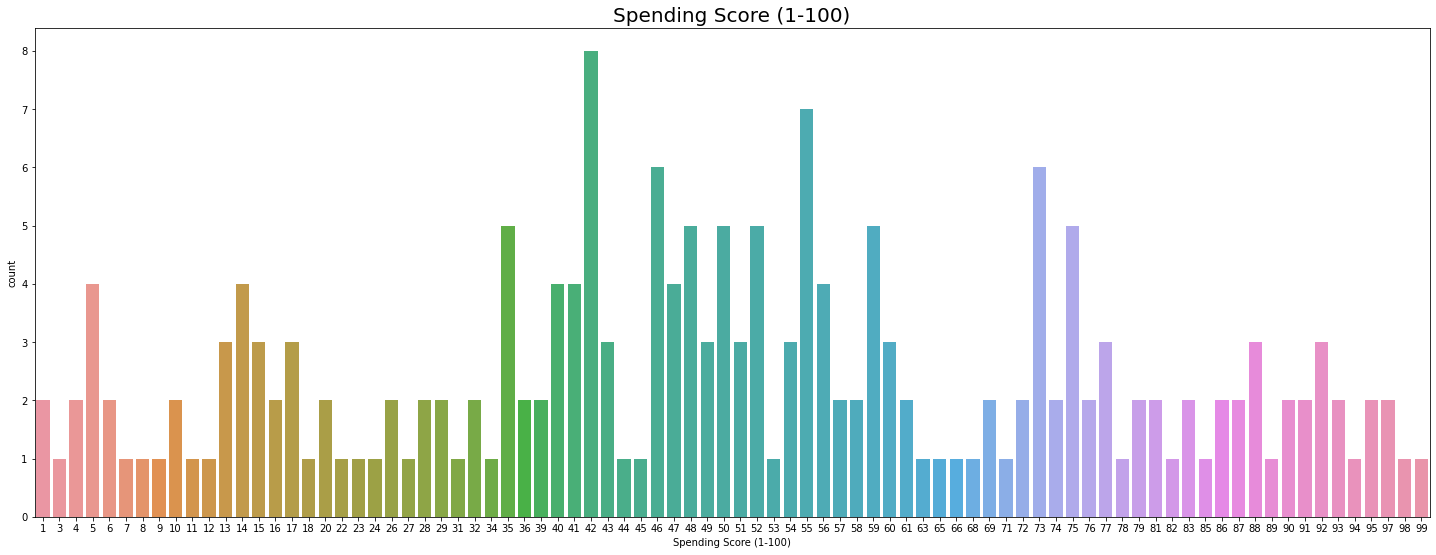

In [11]:
plt.figure(figsize=(25,9))
sns.countplot(data=df,x=df['Spending Score (1-100)'])
plt.title("Spending Score (1-100)",fontsize=20)
plt.show()

In [12]:
df.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [13]:
X=df.iloc[:,[3,4]].values

In [14]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

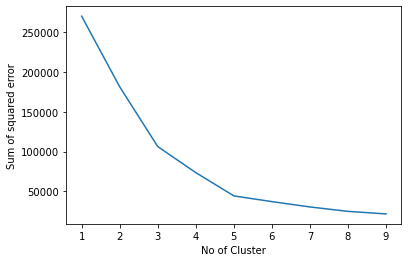

In [15]:
plt.xlabel("No of Cluster")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)

In [16]:
K_means=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [17]:
y_kmeans=K_means.fit_predict(X)

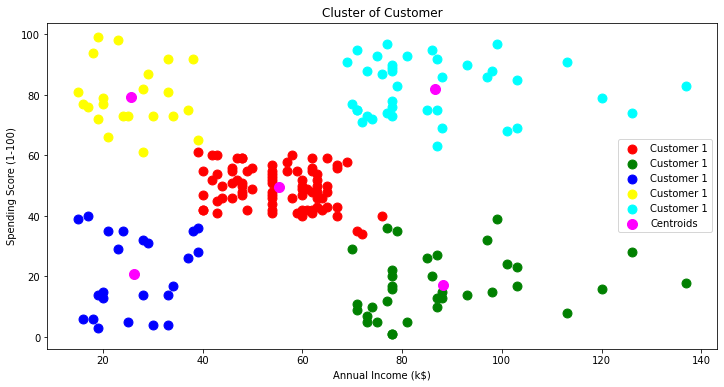

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red', label='Customer 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='green', label='Customer 1')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='blue', label='Customer 1')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='yellow', label='Customer 1')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='cyan', label='Customer 1')

plt.scatter(K_means.cluster_centers_[:,0],K_means.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title("Cluster of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()